In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/My Drive/Colab Notebooks Datasets/Indian State Wise Crime Dataset.csv')
df.head(35)

,State,Rape,Kidnapping and Abduction,Property Theft,Corruption,Sexual Harrasment,Complaints Against Police,Auto Theft,Dowry Deaths,Molestation,Cruelty by Husband and Relatives,Murder
0,Andaman & Nicobar Islands,84,76.000000,2589,27.000000,139,1823,147.000000,22,1316,293,137.000000
1,Andhra Pradesh,10696,17287.000000,487666,2747.000000,45794,111960,87783.000000,15260,84665,187279,27481.000000
2,Arunachal Pradesh,412,682.000000,11340,10.000000,81,2732,1184.000000,0,2868,580,703.000000
3,Assam,12762,20363.000000,150172,91.000000,276,2933,14089.000000,2364,21145,47565,12761.000000
4,Bihar,11263,28180.000000,237858,684.000000,671,27726,26309.000000,36232,20893,53295,34675.000000
5,Chandigarh,228,510.000000,27454,72.000000,434,7236,9728.000000,95,811,2300,202.000000
6,Chhattisgarh,9751,2423.000000,134312,351.111111,6201,47848,22392.000000,3610,80450,39437,10787.000000
7,Dadra & Nagar Haveli,49,123.000000,1906,2.000000,14,9,310.000000,16,191,213,87.000000
8,Daman & Diu,14,27.500000,1295,1.000000,13,15,386.666667,12,33,116,58.888889
9,Delhi,5171,18217.000000,324276,588.000000,5044,116696,120045.000000,8025,25980,16223,5396.000000


In [ ]:
dfc=df.copy()

In [ ]:
df.describe()

,Rape,Kidnapping and Abduction,Property Theft,Corruption,Sexual Harrasment,Complaints Against Police,Auto Theft,Dowry Deaths,Molestation,Cruelty by Husband and Relatives,Murder
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,5432.971429,7657.779365,162764.742857,933.882540,9050.285714,52511.657143,36864.761905,8677.800000,43707.285714,70926.685714,9939.120635
std,6584.456007,9777.969462,202838.897491,1257.605036,19519.893745,77857.044288,47026.362500,16385.952418,67818.290433,120750.103770,12680.800452
min,7.000000,10.000000,230.000000,1.000000,0.000000,6.000000,46.000000,0.000000,12.000000,11.000000,13.333333
25%,271.500000,453.000000,10539.500000,28.500000,62.500000,1659.500000,1620.500000,22.000000,1248.500000,264.500000,557.500000
50%,3339.000000,2423.000000,106118.000000,351.111111,1100.000000,15890.000000,14089.000000,2364.000000,13407.000000,16223.000000,5396.000000
75%,9305.500000,11761.500000,271574.500000,1654.500000,7256.500000,74362.500000,84562.000000,8093.000000,73615.500000,61089.000000,14429.000000
max,29257.000000,41952.000000,925000.000000,4638.000000,82022.000000,329883.000000,175724.000000,85205.000000,302004.000000,496206.000000,58810.000000


In [ ]:
# df = df.drop(['State'], axis = 1)
# dfc = dfc.drop(['Grand Total','Lat-Long', 'X', 'Y'], axis = 1)
df.columns

Index(['State', 'Rape', 'Kidnapping and Abduction', 'Property Theft',
       'Corruption', 'Sexual Harrasment', 'Complaints Against Police',
       'Auto Theft', 'Dowry Deaths', 'Molestation',
       'Cruelty by Husband and Relatives', 'Murder'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mx = MinMaxScaler()
df[['Rape', 'Kidnapping and Abduction', 'Property Theft', 'Corruption',
       'Sexual Harrasment', 'Complaints Against Police', 'Auto Theft',
       'Dowry Deaths', 'Molestation', 'Cruelty by Husband and Relatives',
       'Murder']] = pd.DataFrame(mx.fit_transform(df.drop('State',axis=1)))

In [ ]:
df.head()

,State,Rape,Kidnapping and Abduction,Property Theft,Corruption,Sexual Harrasment,Complaints Against Police,Auto Theft,Dowry Deaths,Molestation,Cruelty by Husband and Relatives,Murder
0,Andaman & Nicobar Islands,0.002632,0.001574,0.002551,0.005607,0.001695,0.005508,0.000575,0.000258,0.004318,0.000568,0.002103
1,Andhra Pradesh,0.365436,0.411926,0.527089,0.592193,0.558314,0.339381,0.499419,0.179097,0.280315,0.377408,0.467164
2,Arunachal Pradesh,0.013846,0.016022,0.012014,0.001941,0.000988,0.008264,0.006478,0.000000,0.009457,0.001147,0.011730
3,Assam,0.436068,0.485265,0.162140,0.019409,0.003365,0.008873,0.079936,0.027745,0.069979,0.095837,0.216809
4,Bihar,0.384821,0.671642,0.256959,0.147294,0.008181,0.084031,0.149495,0.425233,0.069144,0.107385,0.589518


[20.530424284724948, 11.232867842673855, 7.41464210554896, 5.852340197330108, 4.586148439508607, 3.39983459817666, 2.7240606789970476, 2.2622168755320895, 1.848959244965235]


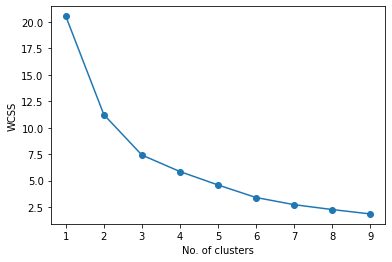

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss=[]
for i in range(1,10):
  kmeans=KMeans(i,random_state=3)
  kmeans.fit(df.drop('State',axis=1))
  wcss.append(kmeans.inertia_)
plt.plot(range(1,10),wcss,'-o')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
print(wcss)

In [ ]:
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score

In [ ]:
# Though we saw that the ideal number of cluster would be either 2 or 3 we try here with 2,3,4,5 just for the sake of demonstration.
l1 = []
l2 = []
l3 = []
l4 = []

for i in (3,4,5):
  kmean = KMeans(i,random_state=42)
  mod_k = kmean.fit(df.drop('State',axis=1))
  pred_k1 = mod_k.predict(df.drop('State',axis=1))
  kmean_sil = silhouette_score(df.drop('State',axis=1),pred_k1,metric='euclidean')
  kmean_cal = calinski_harabasz_score(df.drop('State',axis=1),pred_k1)
  kmean_dav = davies_bouldin_score(df.drop('State',axis=1),pred_k1)
  print(i,'\t','Silhouette Score:' ,kmean_sil,',Calinski Harbasz Score: ',kmean_cal,',Davies Bouldin Score: ',kmean_dav)
  l1.append(kmean_sil)
  l2.append(kmean_cal)
  l3.append(kmean_dav)
  l4.append(i)

3 	 Silhouette Score: 0.4872644394026131 ,Calinski Harbasz Score:  28.302446952870003 ,Davies Bouldin Score:  1.0387068789191276
4 	 Silhouette Score: 0.48648563083726476 ,Calinski Harbasz Score:  25.91673253016658 ,Davies Bouldin Score:  0.8308686407170681
5 	 Silhouette Score: 0.48380087950807066 ,Calinski Harbasz Score:  26.0746180409144 ,Davies Bouldin Score:  0.540956030693649


In [ ]:
pd.DataFrame({'Cluster_number':l4,'Silhoutte Score':l1,'Calinski Harabasz Index':l2,'Davies Bouldin Score':l3})

,Cluster_number,Silhoutte Score,Calinski Harabasz Index,Davies Bouldin Score
0,3,0.487264,28.302447,1.038707
1,4,0.486486,25.916733,0.830869
2,5,0.483801,26.074618,0.540956


In [ ]:
#KMeans Clustering on unnormalized data
l1 = []
l2 = []
l3 = []
l4 = []
for i in (3,4,5):
  kmean = KMeans(i,random_state=42)
  mod_k = kmean.fit(dfc.drop('State', axis=1))
  pred_k2 = mod_k.predict(dfc.drop('State',axis=1))
  kmean_sil = silhouette_score(dfc.drop('State',axis=1),pred_k2,metric='euclidean')
  kmean_cal = calinski_harabasz_score(dfc.drop('State',axis=1),pred_k2)
  kmean_dav = davies_bouldin_score(dfc.drop('State',axis=1),pred_k2)
  print(i,'\t','Silhouette Score:' ,kmean_sil,',Calinski Harbasz Score: ',kmean_cal,',Davies Bouldin Score: ',kmean_dav)
  l1.append(kmean_sil)
  l2.append(kmean_cal)
  l3.append(kmean_dav)
  l4.append(i)

3 	 Silhouette Score: 0.5916160092129706 ,Calinski Harbasz Score:  48.975553627529784 ,Davies Bouldin Score:  0.5634301252719922
4 	 Silhouette Score: 0.5281284650911247 ,Calinski Harbasz Score:  50.70783258082658 ,Davies Bouldin Score:  0.7660240812450033
5 	 Silhouette Score: 0.5320974529444714 ,Calinski Harbasz Score:  54.754327327684564 ,Davies Bouldin Score:  0.7172113738895316


In [ ]:
pd.DataFrame({'Cluster_number':l4,'Silhoutte Score':l1,'Calinski Harabasz Index':l2,'Davies Bouldin Score':l3})

,Cluster_number,Silhoutte Score,Calinski Harabasz Index,Davies Bouldin Score
0,3,0.591616,48.975554,0.563430
1,4,0.528128,50.707833,0.766024
2,5,0.532097,54.754327,0.717211


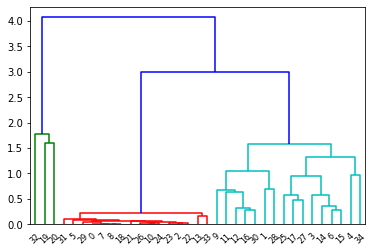

In [ ]:
from scipy.cluster.hierarchy import dendrogram
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(df.drop('State',axis=1),method='ward'))

In [ ]:
list1=['single','complete','average','ward']

In [ ]:
from sklearn.cluster import AgglomerativeClustering
l1=[]
l2=[]
l3=[]
l4=[]
l5=[]
for j in list1:
  for i in (3,4,5):
    agg_m=AgglomerativeClustering(n_clusters=i,affinity='euclidean',linkage=j)
    mod_k=agg_m.fit(df.drop('State',axis=1))
    #pred_k=mod_k.predict(df.drop('State',axis=1))
    kmean_sil=silhouette_score(df.drop('State',axis=1),agg_m.labels_,metric='euclidean')
    kmean_cal=calinski_harabasz_score(df.drop('State',axis=1),agg_m.labels_)
    kmean_dav=davies_bouldin_score(df.drop('State',axis=1),agg_m.labels_)
    print(i,j)
    print(i,'\t','Silhouette Score:' ,kmean_sil,',Calinski Harbasz Score: ',kmean_cal,',Davies Bouldin Score: ',kmean_dav)
    print('---------')
    print('\n')
    l1.append(i)
    l2.append(j)
    l3.append(kmean_sil)
    l4.append(kmean_cal)
    l5.append(kmean_dav)

3 single
3 	 Silhouette Score: 0.5213882325690078 ,Calinski Harbasz Score:  7.570521694311214 ,Davies Bouldin Score:  0.31561325030417714
---------


4 single
4 	 Silhouette Score: 0.5526010370689705 ,Calinski Harbasz Score:  12.244787085569198 ,Davies Bouldin Score:  0.26130047179338434
---------


5 single
5 	 Silhouette Score: 0.3858554054176889 ,Calinski Harbasz Score:  10.863021588973172 ,Davies Bouldin Score:  0.32912951350503844
---------


3 complete
3 	 Silhouette Score: 0.5898436775929106 ,Calinski Harbasz Score:  14.808088041125158 ,Davies Bouldin Score:  0.6565804692361339
---------


4 complete
4 	 Silhouette Score: 0.5526010370689705 ,Calinski Harbasz Score:  12.244787085569198 ,Davies Bouldin Score:  0.26130047179338434
---------


5 complete
5 	 Silhouette Score: 0.45381008352283264 ,Calinski Harbasz Score:  22.63071013182129 ,Davies Bouldin Score:  0.5992158797624508
---------


3 average
3 	 Silhouette Score: 0.5898436775929106 ,Calinski Harbasz Score:  14.80808804112

In [ ]:
pd.DataFrame({'Cluster':l1,'Linkage':l2,'Silhoutte Score':l3,'Calinski Harabasz Index':l4,'Davies Bouldin Score':l5})

,Cluster,Linkage,Silhoutte Score,Calinski Harabasz Index,Davies Bouldin Score
0,3,single,0.521388,7.570522,0.315613
1,4,single,0.552601,12.244787,0.261300
2,5,single,0.385855,10.863022,0.329130
3,3,complete,0.589844,14.808088,0.656580
4,4,complete,0.552601,12.244787,0.261300
5,5,complete,0.453810,22.630710,0.599216
6,3,average,0.589844,14.808088,0.656580
7,4,average,0.552601,12.244787,0.261300
8,5,average,0.385855,10.863022,0.329130
9,3,ward,0.453579,26.349234,0.963965


In [ ]:
l1=[]
l2=[]
l3=[]
l4=[]
l5=[]
for j in list1:
 for i in (3,4,5):
  agm=AgglomerativeClustering(n_clusters=i,affinity='euclidean',linkage=j)
  mod_k=agm.fit(dfc.drop('State',axis=1))
  #pred_k=mod_k.predict(df.drop('Neighbourhood',axis=1))
  kmean_sil=silhouette_score(dfc.drop('State',axis=1),agm.labels_,metric='euclidean')
  kmean_cal=calinski_harabasz_score(dfc.drop('State',axis=1),agm.labels_)
  kmean_dav=davies_bouldin_score(dfc.drop('State',axis=1),agm.labels_)
  print(i,j)
  print(i,'\t','Silhouette Score:' ,kmean_sil,',Calinski Harbasz Score: ',kmean_cal,',Davies Bouldin Score: ',kmean_dav)
  print('---------')
  print('\n')
  l1.append(i)
  l2.append(j)
  l3.append(kmean_sil)
  l4.append(kmean_cal)
  l5.append(kmean_dav)

3 single
3 	 Silhouette Score: 0.5224321531751144 ,Calinski Harbasz Score:  15.19687050188612 ,Davies Bouldin Score:  0.2627269959271608
---------


4 single
4 	 Silhouette Score: 0.44422167917013183 ,Calinski Harbasz Score:  13.015098448597115 ,Davies Bouldin Score:  0.3043714265011766
---------


5 single
5 	 Silhouette Score: 0.41222847734575924 ,Calinski Harbasz Score:  12.394779737800405 ,Davies Bouldin Score:  0.30164582783737864
---------


3 complete
3 	 Silhouette Score: 0.5656258921833869 ,Calinski Harbasz Score:  41.19299020443294 ,Davies Bouldin Score:  0.5550690937898012
---------


4 complete
4 	 Silhouette Score: 0.5718898783059407 ,Calinski Harbasz Score:  42.95690271280026 ,Davies Bouldin Score:  0.49034365070002306
---------


5 complete
5 	 Silhouette Score: 0.5441105215167421 ,Calinski Harbasz Score:  42.405052026509345 ,Davies Bouldin Score:  0.43970243387940283
---------


3 average
3 	 Silhouette Score: 0.5916160092129706 ,Calinski Harbasz Score:  48.975553627529

In [ ]:
pd.DataFrame({'Cluster':l1,'Linkage':l2,'Silhoutte Score':l3,'Calinski Harabasz Index':l4,'Davies Bouldin Score':l5})

,Cluster,Linkage,Silhoutte Score,Calinski Harabasz Index,Davies Bouldin Score
0,3,single,0.522432,15.196871,0.262727
1,4,single,0.444222,13.015098,0.304371
2,5,single,0.412228,12.394780,0.301646
3,3,complete,0.565626,41.192990,0.555069
4,4,complete,0.571890,42.956903,0.490344
5,5,complete,0.544111,42.405052,0.439702
6,3,average,0.591616,48.975554,0.563430
7,4,average,0.571890,42.956903,0.490344
8,5,average,0.544111,42.405052,0.439702
9,3,ward,0.591616,48.975554,0.563430


In [ ]:
kmeansf = KMeans(n_clusters = 3,random_state = 31)
kmeansf.fit(df.drop(['State'],axis = 1))
pred_kk = kmeansf.predict(df.drop(['State'],axis=1))
df['pred_kmeans'] = pred_kk

In [ ]:
df.head()

,State,Rape,Kidnapping and Abduction,Property Theft,Corruption,Sexual Harrasment,Complaints Against Police,Auto Theft,Dowry Deaths,Molestation,Cruelty by Husband and Relatives,Murder,pred_kmeans
0,Andaman & Nicobar Islands,0.002632,0.001574,0.002551,0.005607,0.001695,0.005508,0.000575,0.000258,0.004318,0.000568,0.002103,1
1,Andhra Pradesh,0.365436,0.411926,0.527089,0.592193,0.558314,0.339381,0.499419,0.179097,0.280315,0.377408,0.467164,0
2,Arunachal Pradesh,0.013846,0.016022,0.012014,0.001941,0.000988,0.008264,0.006478,0.000000,0.009457,0.001147,0.011730,1
3,Assam,0.436068,0.485265,0.162140,0.019409,0.003365,0.008873,0.079936,0.027745,0.069979,0.095837,0.216809,1
4,Bihar,0.384821,0.671642,0.256959,0.147294,0.008181,0.084031,0.149495,0.425233,0.069144,0.107385,0.589518,0


In [ ]:
df1 = pd.melt(frame=df.drop('State',axis=1),id_vars='pred_kmeans',var_name='parameters',value_name='values')
df1.head(20)

,pred_kmeans,parameters,values
0,1,Rape,0.002632
1,0,Rape,0.365436
2,1,Rape,0.013846
3,1,Rape,0.436068
4,0,Rape,0.384821
5,1,Rape,0.007556
6,1,Rape,0.333128
7,1,Rape,0.001436
8,1,Rape,0.000239
9,0,Rape,0.176547


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


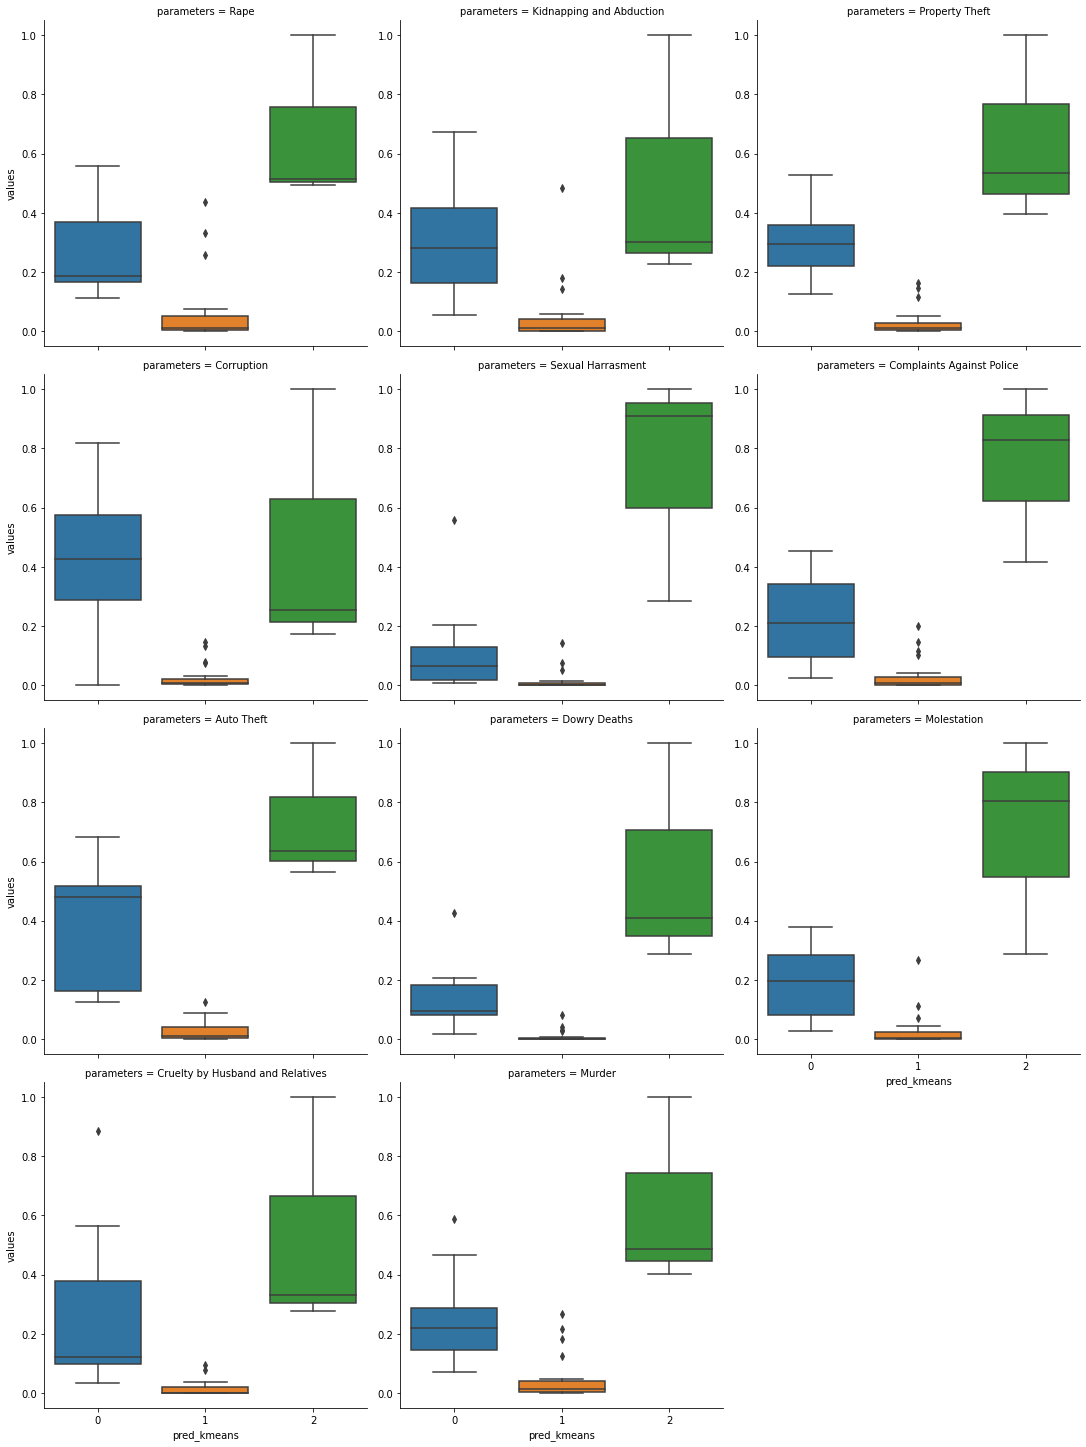

In [ ]:
import seaborn as sns 
sns.factorplot(data=df1, y = 'values', x = 'pred_kmeans',col = 'parameters', kind = 'box',sharey = False, col_wrap = 3)

In [ ]:
agg_mod_ = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
agg_mod_.fit(df.drop('State', axis=1))
df['agg_clust2']=agg_mod_.labels_

In [ ]:
df2=pd.melt(frame=df.drop(['State','pred_kmeans'],axis=1),id_vars='agg_clust2',var_name='parameters',value_name='values')
df2.head()

,agg_clust2,parameters,values
0,2,Rape,0.002632
1,1,Rape,0.365436
2,2,Rape,0.013846
3,2,Rape,0.436068
4,1,Rape,0.384821


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


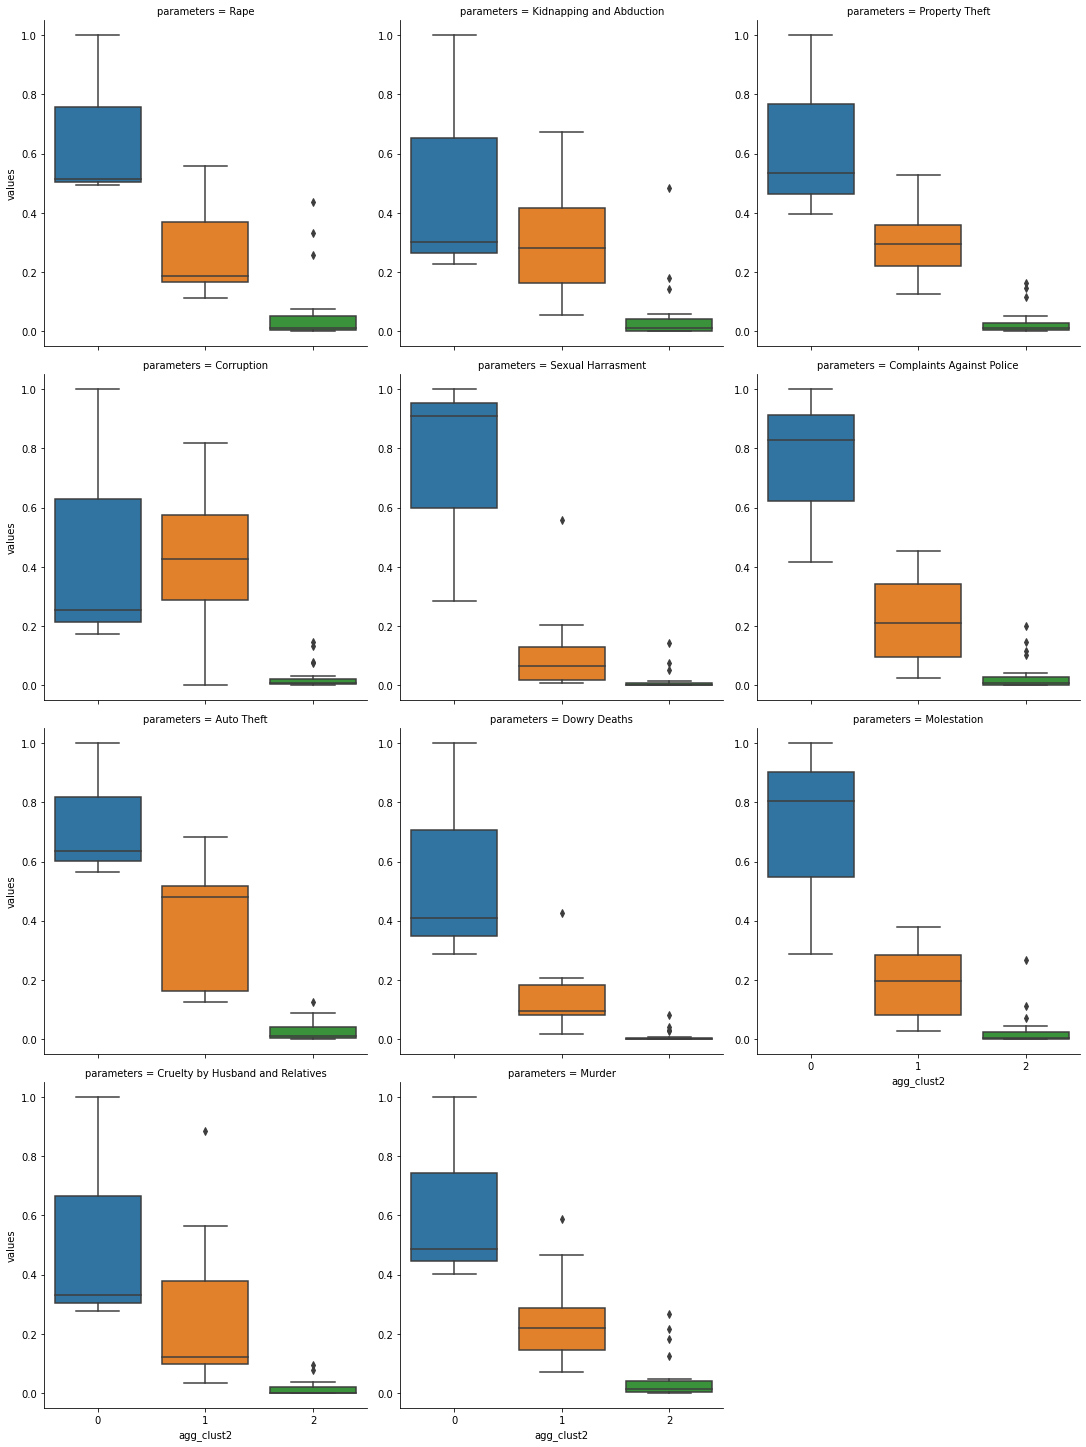

In [ ]:
sns.factorplot(data=df2,y='values',x='agg_clust2',col='parameters',kind='box',sharey=False, col_wrap = 3)

In [ ]:
!pip install fuzzy-c-means

In [ ]:
%matplotlib inline
import numpy as np
from fcmeans import FCM
from matplotlib import pyplot as plt

In [ ]:
df.head()

,State,Rape,Kidnapping and Abduction,Property Theft,Corruption,Sexual Harrasment,Complaints Against Police,Auto Theft,Dowry Deaths,Molestation,Cruelty by Husband and Relatives,Murder,pred_kmeans,agg_clust2
0,Andaman & Nicobar Islands,0.002632,0.001574,0.002551,0.005607,0.001695,0.005508,0.000575,0.000258,0.004318,0.000568,0.002103,1,2
1,Andhra Pradesh,0.365436,0.411926,0.527089,0.592193,0.558314,0.339381,0.499419,0.179097,0.280315,0.377408,0.467164,0,1
2,Arunachal Pradesh,0.013846,0.016022,0.012014,0.001941,0.000988,0.008264,0.006478,0.000000,0.009457,0.001147,0.011730,1,2
3,Assam,0.436068,0.485265,0.162140,0.019409,0.003365,0.008873,0.079936,0.027745,0.069979,0.095837,0.216809,1,2
4,Bihar,0.384821,0.671642,0.256959,0.147294,0.008181,0.084031,0.149495,0.425233,0.069144,0.107385,0.589518,0,1


In [ ]:
X = df.iloc[:,1:12].values

n_clusters_list = [2, 3, 4, 5, 6, 7]
models = list()
for n_clusters in n_clusters_list:
    fcm = FCM(n_clusters)
    abc = fcm.fit(X)
    models.append(fcm)

Text(0, 0.5, 'Fuzzy partition coefficient')

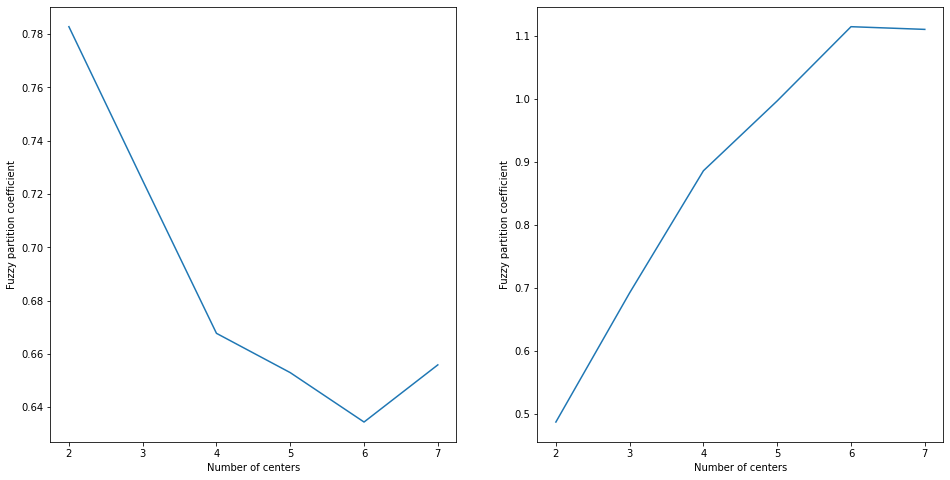

In [ ]:
# num_clusters = len(n_clusters_list)
# f, axes = plt.subplots(3, 2, figsize=(11,16))
# for n_clusters, model, axe in zip(n_clusters_list, models, axes.ravel()):
#     # get validation metrics
#     pc = model.partition_coefficient
#     pec = model.partition_entropy_coefficient
    
#     fcm_centers = model.centers
#     fcm_labels = model.predict(X)
#     # plot result
#     axe.scatter(X[:,0], X[:,1], c=fcm_labels, alpha=.1)
#     axe.scatter(fcm_centers[:,0], fcm_centers[:,1], marker="+", s=500, c='black')
#     axe.set_title(f'n_clusters = {n_clusters}, PC = {pc:.3f}, PEC = {pec:.3f}')
# plt.show()


FPC = []
FPEC = []
for model in models:
  FPC.append(model.partition_coefficient)
  FPEC.append(model.partition_entropy_coefficient)

fig2, ax2 = plt.subplots(1, 2, figsize = (16,8))
ax2[0].plot(n_clusters_list, FPC)
ax2[1].plot(n_clusters_list, FPEC)
ax2[0].set_xlabel("Number of centers")
ax2[0].set_ylabel("Fuzzy partition coefficient")
ax2[1].set_xlabel("Number of centers")
ax2[1].set_ylabel("Fuzzy partition coefficient")

In [ ]:
# Though we saw that the ideal number of cluster would be 3, we try here with 3,4,5 just for the sake of demonstration.
l1 = []
l2 = []
l3 = []
l4 = []
X = df.iloc[:,1:12].values

for i in (2,3,4,5):
  fcm = FCM(i)
  mod_k = fcm.fit(X)
  fcm_k1 = fcm.predict(X)
  fcm_sil = silhouette_score(X,fcm_k1,metric='euclidean')
  fcm_cal = calinski_harabasz_score(X,fcm_k1)
  fcm_dav = davies_bouldin_score(X,fcm_k1)
  print(i,'\t','Silhouette Score:' ,fcm_sil,',Calinski Harbasz Score: ',fcm_cal,',Davies Bouldin Score: ',fcm_dav)
  l1.append(fcm_sil)
  l2.append(fcm_cal)
  l3.append(fcm_dav)
  l4.append(i)

2 	 Silhouette Score: 0.4855679738814069 ,Calinski Harbasz Score:  26.677354249690676 ,Davies Bouldin Score:  0.9819282175745739
3 	 Silhouette Score: 0.47348266576957015 ,Calinski Harbasz Score:  27.527122182887165 ,Davies Bouldin Score:  1.0990869135409784
4 	 Silhouette Score: 0.4337704948654341 ,Calinski Harbasz Score:  20.804381328227045 ,Davies Bouldin Score:  1.4489302888035134
5 	 Silhouette Score: 0.44986692164702025 ,Calinski Harbasz Score:  19.99804692438055 ,Davies Bouldin Score:  1.1628513100546847


In [ ]:
pd.DataFrame({'Cluster_number':l4, 'Silhouette Score':l1, 'Calinski Harbasz Score':l2, 'Davies Bouldin Score':l3})

,Cluster_number,Silhouette Score,Calinski Harbasz Score,Davies Bouldin Score
0,2,0.485568,26.677354,0.981928
1,3,0.473483,27.527122,1.099087
2,4,0.433770,20.804381,1.448930
3,5,0.449867,19.998047,1.162851


In [ ]:
dfc.columns

Index(['State', 'Rape', 'Kidnapping and Abduction', 'Property Theft',
       'Corruption', 'Sexual Harrasment', 'Complaints Against Police',
       'Auto Theft', 'Dowry Deaths', 'Molestation',
       'Cruelty by Husband and Relatives', 'Murder'],
      dtype='object')

In [ ]:
# Let's try performing FCM Clustering on unnormalized data and check what's happening
l1 = []
l2 = []
l3 = []
l4 = []

X = dfc.iloc[:,1:12].values

for i in (2,3,4,5):
  fcm = FCM(i)
  mod_k = fcm.fit(X)
  fcm_k2 = fcm.predict(X)
  fcm_sil = silhouette_score(X,fcm_k2,metric='euclidean')
  fcm_cal = calinski_harabasz_score(X,fcm_k2)
  fcm_dav = davies_bouldin_score(X,fcm_k2)
  print(i,'\t','Silhouette Score:' ,fcm_sil,',Calinski Harbasz Score: ',fcm_cal,',Davies Bouldin Score: ',fcm_dav)
  l1.append(fcm_sil)
  l2.append(fcm_cal)
  l3.append(fcm_dav)
  l4.append(i)

2 	 Silhouette Score: 0.5992167803877515 ,Calinski Harbasz Score:  45.65915258803848 ,Davies Bouldin Score:  0.7303571883592149
3 	 Silhouette Score: 0.5715038815683131 ,Calinski Harbasz Score:  47.98868509099317 ,Davies Bouldin Score:  0.563789802418635
4 	 Silhouette Score: 0.5281284650911247 ,Calinski Harbasz Score:  50.707832580826576 ,Davies Bouldin Score:  0.7660240812450033
5 	 Silhouette Score: 0.5176739855048038 ,Calinski Harbasz Score:  48.24463757128706 ,Davies Bouldin Score:  0.7474848662337175


In [ ]:
pd.DataFrame({'Cluster_number':l4, 'Silhouette Score':l1, 'Calinski Harbasz Score':l2, 'Davies Bouldin Score':l3})

,Cluster_number,Silhouette Score,Calinski Harbasz Score,Davies Bouldin Score
0,2,0.599217,45.659153,0.730357
1,3,0.571504,47.988685,0.563790
2,4,0.528128,50.707833,0.766024
3,5,0.517674,48.244638,0.747485


In [ ]:
X = df.iloc[:, 1:12].values

fcmf = FCM(3)
fcmf.fit(X)
fcm_k2 = fcmf.predict(X)
df['fcm_k2'] = fcm_k2

In [ ]:
df3 = pd.melt(frame=df.drop(['State', 'pred_kmeans', 'agg_clust2'],axis=1),id_vars='fcm_k2',var_name='parameters',value_name='values')
df3.head()

,fcm_k2,parameters,values
0,2,Rape,0.002632
1,0,Rape,0.365436
2,2,Rape,0.013846
3,2,Rape,0.436068
4,1,Rape,0.384821


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


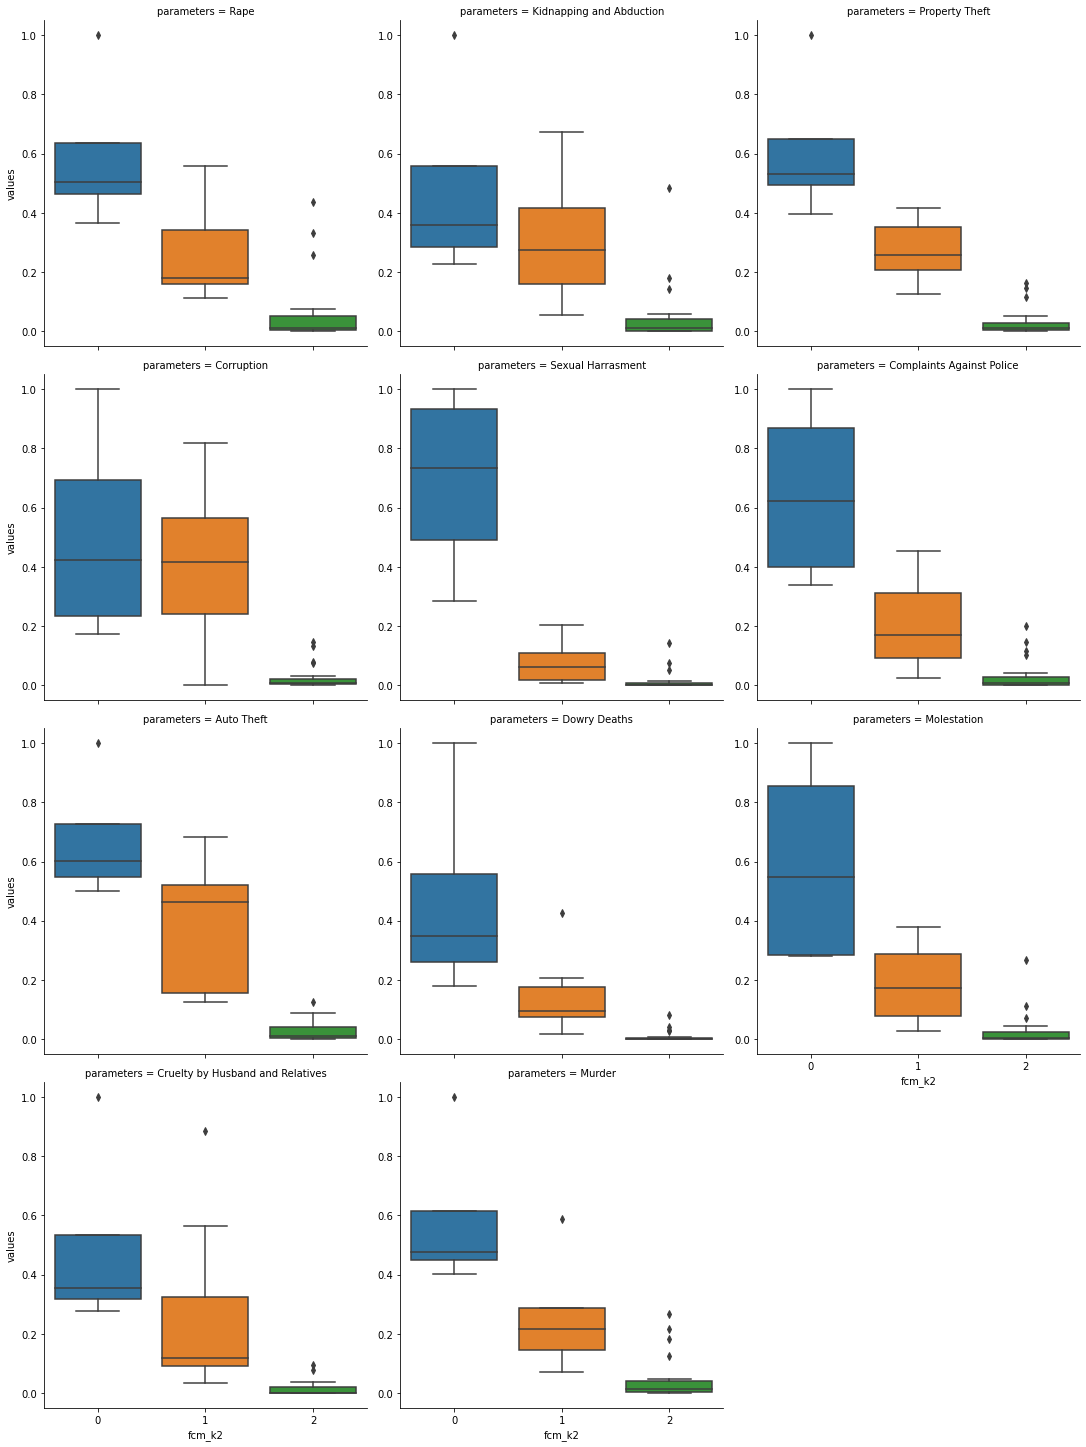

In [ ]:
sns.factorplot(data = df3, y = 'values', x = 'fcm_k2', col = 'parameters', kind = 'box', sharey = False, col_wrap = 3)

## Map - Visualization (India)

In [ ]:
!pip install geopandas

In [ ]:
import geopandas
map=geopandas.read_file('/content/drive/My Drive/Colab Notebooks Datasets/Indian Map Polygon/Indian_States.shp')

In [ ]:
print(type(map))

<class 'geopandas.geodataframe.GeoDataFrame'>


In [ ]:
print(map.shape)

(36, 2)


In [ ]:
print(map.head(map.shape[0]))

                       st_nm                                           geometry
0   Andaman & Nicobar Island  MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...
1         Arunanchal Pradesh  POLYGON ((96.16261 29.38078, 96.16860 29.37432...
2                      Assam  MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...
3                      Bihar  MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...
4                 Chandigarh  POLYGON ((76.84147 30.75996, 76.83599 30.73623...
5               Chhattisgarh  POLYGON ((83.33532 24.09885, 83.35346 24.09627...
6     Dadara & Nagar Havelli  POLYGON ((73.20657 20.12216, 73.20797 20.10650...
7                Daman & Diu  MULTIPOLYGON (((72.89335 20.44539, 72.89281 20...
8                        Goa  MULTIPOLYGON (((74.11918 14.75344, 74.11350 14...
9                    Gujarat  MULTIPOLYGON (((71.70375 20.99958, 71.70375 20...
10                   Haryana  POLYGON ((76.85065 30.87512, 76.86594 30.86691...
11          Himachal Pradesh  POLYGON ((

In [ ]:
map = map.sort_values(by = 'st_nm')
print(map.shape)
map.head(map.shape[0])

(36, 2)


,st_nm,geometry
0,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
35,Andhra Pradesh,"MULTIPOLYGON (((81.10380 17.82269, 81.10610 17..."
1,Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."
5,Chhattisgarh,"POLYGON ((83.33532 24.09885, 83.35346 24.09627..."
6,Dadara & Nagar Havelli,"POLYGON ((73.20657 20.12216, 73.20797 20.10650..."
7,Daman & Diu,"MULTIPOLYGON (((72.89335 20.44539, 72.89281 20..."
8,Goa,"MULTIPOLYGON (((74.11918 14.75344, 74.11350 14..."


In [ ]:
# map.drop(29, axis=0, inplace=True)

In [ ]:
# map.head(35)

In [ ]:
df.head(df.shape[0])

,State,Rape,Kidnapping and Abduction,Property Theft,Corruption,Sexual Harrasment,Complaints Against Police,Auto Theft,Dowry Deaths,Molestation,Cruelty by Husband and Relatives,Murder,pred_kmeans,agg_clust2,fcm_k2
0,Andaman & Nicobar Islands,0.002632,0.001574,0.002551,0.005607,0.001695,0.005508,0.000575,0.000258,0.004318,0.000568,0.002103,1,2,2
1,Andhra Pradesh,0.365436,0.411926,0.527089,0.592193,0.558314,0.339381,0.499419,0.179097,0.280315,0.377408,0.467164,0,1,0
2,Arunachal Pradesh,0.013846,0.016022,0.012014,0.001941,0.000988,0.008264,0.006478,0.000000,0.009457,0.001147,0.011730,1,2,2
3,Assam,0.436068,0.485265,0.162140,0.019409,0.003365,0.008873,0.079936,0.027745,0.069979,0.095837,0.216809,1,2,2
4,Bihar,0.384821,0.671642,0.256959,0.147294,0.008181,0.084031,0.149495,0.425233,0.069144,0.107385,0.589518,0,1,1
5,Chandigarh,0.007556,0.011921,0.029439,0.015312,0.005291,0.021917,0.055112,0.001115,0.002646,0.004613,0.003209,1,2,2
6,Chhattisgarh,0.333128,0.057532,0.144990,0.075504,0.075602,0.145030,0.127199,0.042368,0.266358,0.079457,0.183236,1,2,2
7,Dadra & Nagar Haveli,0.001436,0.002694,0.001812,0.000216,0.000171,0.000009,0.001503,0.000188,0.000593,0.000407,0.001253,1,2,2
8,Daman & Diu,0.000239,0.000417,0.001152,0.000000,0.000158,0.000027,0.001939,0.000141,0.000070,0.000212,0.000775,1,2,2
9,Delhi,0.176547,0.434099,0.350407,0.126590,0.061496,0.353738,0.683062,0.094185,0.085989,0.032673,0.091547,0,1,1


In [ ]:
df.loc[35] = df.iloc[1]
# df.at['35', 'State'] = 'Telangana'
print(df.head(df.shape[0]))

                        State      Rape  ...  agg_clust2  fcm_k2
0   Andaman & Nicobar Islands  0.002632  ...           2       2
1              Andhra Pradesh  0.365436  ...           1       0
2           Arunachal Pradesh  0.013846  ...           2       2
3                       Assam  0.436068  ...           2       2
4                       Bihar  0.384821  ...           1       1
5                  Chandigarh  0.007556  ...           2       2
6                Chhattisgarh  0.333128  ...           2       2
7        Dadra & Nagar Haveli  0.001436  ...           2       2
8                 Daman & Diu  0.000239  ...           2       2
9                       Delhi  0.176547  ...           1       1
10                        Goa  0.008991  ...           2       2
11                    Gujarat  0.113915  ...           1       1
12                    Haryana  0.171009  ...           1       1
13           Himachal Pradesh  0.049436  ...           2       2
14            Jammu & Kas

In [ ]:
df.at[35,'State'] = 'Telangana'
df.at[35,'State']

'Telangana'

In [ ]:
print(df.head(df.shape[0]))

                        State      Rape  ...  agg_clust2  fcm_k2
0   Andaman & Nicobar Islands  0.002632  ...           2       2
1              Andhra Pradesh  0.365436  ...           1       0
2           Arunachal Pradesh  0.013846  ...           2       2
3                       Assam  0.436068  ...           2       2
4                       Bihar  0.384821  ...           1       1
5                  Chandigarh  0.007556  ...           2       2
6                Chhattisgarh  0.333128  ...           2       2
7        Dadra & Nagar Haveli  0.001436  ...           2       2
8                 Daman & Diu  0.000239  ...           2       2
9                       Delhi  0.176547  ...           1       1
10                        Goa  0.008991  ...           2       2
11                    Gujarat  0.113915  ...           1       1
12                    Haryana  0.171009  ...           1       1
13           Himachal Pradesh  0.049436  ...           2       2
14            Jammu & Kas

In [ ]:
# df.drop('35', axis = 0, inplace = True)

In [ ]:
print(df.head(df.shape[0]))

                        State      Rape  ...  agg_clust2  fcm_k2
0   Andaman & Nicobar Islands  0.002632  ...           2       2
1              Andhra Pradesh  0.365436  ...           1       0
2           Arunachal Pradesh  0.013846  ...           2       2
3                       Assam  0.436068  ...           2       2
4                       Bihar  0.384821  ...           1       1
5                  Chandigarh  0.007556  ...           2       2
6                Chhattisgarh  0.333128  ...           2       2
7        Dadra & Nagar Haveli  0.001436  ...           2       2
8                 Daman & Diu  0.000239  ...           2       2
9                       Delhi  0.176547  ...           1       1
10                        Goa  0.008991  ...           2       2
11                    Gujarat  0.113915  ...           1       1
12                    Haryana  0.171009  ...           1       1
13           Himachal Pradesh  0.049436  ...           2       2
14            Jammu & Kas

In [ ]:
replace={'Andaman & Nicobar Islands':'Andaman & Nicobar Island','Arunachal Pradesh':'Arunanchal Pradesh','Dadra & Nagar Haveli':'Dadara & Nagar Havelli', 'Delhi':'NCT of Delhi'}
df = df.replace({"State": replace})  

In [ ]:
df = df.sort_values(by = 'State')
df.head(df.shape[0])

,State,Rape,Kidnapping and Abduction,Property Theft,Corruption,Sexual Harrasment,Complaints Against Police,Auto Theft,Dowry Deaths,Molestation,Cruelty by Husband and Relatives,Murder,pred_kmeans,agg_clust2,fcm_k2
0,Andaman & Nicobar Island,0.002632,0.001574,0.002551,0.005607,0.001695,0.005508,0.000575,0.000258,0.004318,0.000568,0.002103,1,2,2
1,Andhra Pradesh,0.365436,0.411926,0.527089,0.592193,0.558314,0.339381,0.499419,0.179097,0.280315,0.377408,0.467164,0,1,0
2,Arunanchal Pradesh,0.013846,0.016022,0.012014,0.001941,0.000988,0.008264,0.006478,0.000000,0.009457,0.001147,0.011730,1,2,2
3,Assam,0.436068,0.485265,0.162140,0.019409,0.003365,0.008873,0.079936,0.027745,0.069979,0.095837,0.216809,1,2,2
4,Bihar,0.384821,0.671642,0.256959,0.147294,0.008181,0.084031,0.149495,0.425233,0.069144,0.107385,0.589518,0,1,1
5,Chandigarh,0.007556,0.011921,0.029439,0.015312,0.005291,0.021917,0.055112,0.001115,0.002646,0.004613,0.003209,1,2,2
6,Chhattisgarh,0.333128,0.057532,0.144990,0.075504,0.075602,0.145030,0.127199,0.042368,0.266358,0.079457,0.183236,1,2,2
7,Dadara & Nagar Havelli,0.001436,0.002694,0.001812,0.000216,0.000171,0.000009,0.001503,0.000188,0.000593,0.000407,0.001253,1,2,2
8,Daman & Diu,0.000239,0.000417,0.001152,0.000000,0.000158,0.000027,0.001939,0.000141,0.000070,0.000212,0.000775,1,2,2
10,Goa,0.008991,0.004530,0.013631,0.006685,0.003597,0.012841,0.016655,0.000986,0.002348,0.001110,0.006780,1,2,2


In [ ]:
df.head(df.shape[0])

,State,Rape,Kidnapping and Abduction,Property Theft,Corruption,Sexual Harrasment,Complaints Against Police,Auto Theft,Dowry Deaths,Molestation,Cruelty by Husband and Relatives,Murder,pred_kmeans,agg_clust2,fcm_k2
0,Andaman & Nicobar Island,0.002632,0.001574,0.002551,0.005607,0.001695,0.005508,0.000575,0.000258,0.004318,0.000568,0.002103,1,2,2
1,Andhra Pradesh,0.365436,0.411926,0.527089,0.592193,0.558314,0.339381,0.499419,0.179097,0.280315,0.377408,0.467164,0,1,0
2,Arunanchal Pradesh,0.013846,0.016022,0.012014,0.001941,0.000988,0.008264,0.006478,0.000000,0.009457,0.001147,0.011730,1,2,2
3,Assam,0.436068,0.485265,0.162140,0.019409,0.003365,0.008873,0.079936,0.027745,0.069979,0.095837,0.216809,1,2,2
4,Bihar,0.384821,0.671642,0.256959,0.147294,0.008181,0.084031,0.149495,0.425233,0.069144,0.107385,0.589518,0,1,1
5,Chandigarh,0.007556,0.011921,0.029439,0.015312,0.005291,0.021917,0.055112,0.001115,0.002646,0.004613,0.003209,1,2,2
6,Chhattisgarh,0.333128,0.057532,0.144990,0.075504,0.075602,0.145030,0.127199,0.042368,0.266358,0.079457,0.183236,1,2,2
7,Dadara & Nagar Havelli,0.001436,0.002694,0.001812,0.000216,0.000171,0.000009,0.001503,0.000188,0.000593,0.000407,0.001253,1,2,2
8,Daman & Diu,0.000239,0.000417,0.001152,0.000000,0.000158,0.000027,0.001939,0.000141,0.000070,0.000212,0.000775,1,2,2
10,Goa,0.008991,0.004530,0.013631,0.006685,0.003597,0.012841,0.016655,0.000986,0.002348,0.001110,0.006780,1,2,2


In [ ]:
df['pred_kmeans_label']=df.pred_kmeans.map({0:'Moderate Crime Rate', 1:'Low Crime Rate', 2:'High Crime Rate'})
df.head()

,State,Rape,Kidnapping and Abduction,Property Theft,Corruption,Sexual Harrasment,Complaints Against Police,Auto Theft,Dowry Deaths,Molestation,Cruelty by Husband and Relatives,Murder,pred_kmeans,agg_clust2,fcm_k2,pred_kmeans_label
0,Andaman & Nicobar Island,0.002632,0.001574,0.002551,0.005607,0.001695,0.005508,0.000575,0.000258,0.004318,0.000568,0.002103,1,2,2,Low Crime Rate
1,Andhra Pradesh,0.365436,0.411926,0.527089,0.592193,0.558314,0.339381,0.499419,0.179097,0.280315,0.377408,0.467164,0,1,0,Moderate Crime Rate
2,Arunanchal Pradesh,0.013846,0.016022,0.012014,0.001941,0.000988,0.008264,0.006478,0.000000,0.009457,0.001147,0.011730,1,2,2,Low Crime Rate
3,Assam,0.436068,0.485265,0.162140,0.019409,0.003365,0.008873,0.079936,0.027745,0.069979,0.095837,0.216809,1,2,2,Low Crime Rate
4,Bihar,0.384821,0.671642,0.256959,0.147294,0.008181,0.084031,0.149495,0.425233,0.069144,0.107385,0.589518,0,1,1,Moderate Crime Rate


In [ ]:
mer_g=pd.merge(df,map,left_on='State',right_on='st_nm',how='inner')
print(mer_g.shape)

(36, 18)


In [ ]:
mer_g.head(mer_g.shape[0])

,State,Rape,Kidnapping and Abduction,Property Theft,Corruption,Sexual Harrasment,Complaints Against Police,Auto Theft,Dowry Deaths,Molestation,Cruelty by Husband and Relatives,Murder,pred_kmeans,agg_clust2,fcm_k2,pred_kmeans_label,st_nm,geometry
0,Andaman & Nicobar Island,0.002632,0.001574,0.002551,0.005607,0.001695,0.005508,0.000575,0.000258,0.004318,0.000568,0.002103,1,2,2,Low Crime Rate,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,Andhra Pradesh,0.365436,0.411926,0.527089,0.592193,0.558314,0.339381,0.499419,0.179097,0.280315,0.377408,0.467164,0,1,0,Moderate Crime Rate,Andhra Pradesh,"MULTIPOLYGON (((81.10380 17.82269, 81.10610 17..."
2,Arunanchal Pradesh,0.013846,0.016022,0.012014,0.001941,0.000988,0.008264,0.006478,0.000000,0.009457,0.001147,0.011730,1,2,2,Low Crime Rate,Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
3,Assam,0.436068,0.485265,0.162140,0.019409,0.003365,0.008873,0.079936,0.027745,0.069979,0.095837,0.216809,1,2,2,Low Crime Rate,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
4,Bihar,0.384821,0.671642,0.256959,0.147294,0.008181,0.084031,0.149495,0.425233,0.069144,0.107385,0.589518,0,1,1,Moderate Crime Rate,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
5,Chandigarh,0.007556,0.011921,0.029439,0.015312,0.005291,0.021917,0.055112,0.001115,0.002646,0.004613,0.003209,1,2,2,Low Crime Rate,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."
6,Chhattisgarh,0.333128,0.057532,0.144990,0.075504,0.075602,0.145030,0.127199,0.042368,0.266358,0.079457,0.183236,1,2,2,Low Crime Rate,Chhattisgarh,"POLYGON ((83.33532 24.09885, 83.35346 24.09627..."
7,Dadara & Nagar Havelli,0.001436,0.002694,0.001812,0.000216,0.000171,0.000009,0.001503,0.000188,0.000593,0.000407,0.001253,1,2,2,Low Crime Rate,Dadara & Nagar Havelli,"POLYGON ((73.20657 20.12216, 73.20797 20.10650..."
8,Daman & Diu,0.000239,0.000417,0.001152,0.000000,0.000158,0.000027,0.001939,0.000141,0.000070,0.000212,0.000775,1,2,2,Low Crime Rate,Daman & Diu,"MULTIPOLYGON (((72.89335 20.44539, 72.89281 20..."
9,Goa,0.008991,0.004530,0.013631,0.006685,0.003597,0.012841,0.016655,0.000986,0.002348,0.001110,0.006780,1,2,2,Low Crime Rate,Goa,"MULTIPOLYGON (((74.11918 14.75344, 74.11350 14..."


In [ ]:
# converting the coordinate reference system to epsg 4326. It containes the geometry of states in terms of their latitude
# and longitude
from geopandas import GeoDataFrame
merg= GeoDataFrame(mer_g,crs={'init': 'epsg:4326'})

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [ ]:
!pip install pandas_bokeh

In [ ]:
merg.head()

,State,Rape,Kidnapping and Abduction,Property Theft,Corruption,Sexual Harrasment,Complaints Against Police,Auto Theft,Dowry Deaths,Molestation,Cruelty by Husband and Relatives,Murder,pred_kmeans,agg_clust2,fcm_k2,pred_kmeans_label,st_nm,geometry
0,Andaman & Nicobar Island,0.002632,0.001574,0.002551,0.005607,0.001695,0.005508,0.000575,0.000258,0.004318,0.000568,0.002103,1,2,2,Low Crime Rate,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,Andhra Pradesh,0.365436,0.411926,0.527089,0.592193,0.558314,0.339381,0.499419,0.179097,0.280315,0.377408,0.467164,0,1,0,Moderate Crime Rate,Andhra Pradesh,"MULTIPOLYGON (((81.10380 17.82269, 81.10610 17..."
2,Arunanchal Pradesh,0.013846,0.016022,0.012014,0.001941,0.000988,0.008264,0.006478,0.000000,0.009457,0.001147,0.011730,1,2,2,Low Crime Rate,Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
3,Assam,0.436068,0.485265,0.162140,0.019409,0.003365,0.008873,0.079936,0.027745,0.069979,0.095837,0.216809,1,2,2,Low Crime Rate,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
4,Bihar,0.384821,0.671642,0.256959,0.147294,0.008181,0.084031,0.149495,0.425233,0.069144,0.107385,0.589518,0,1,1,Moderate Crime Rate,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."


In [ ]:
import pandas_bokeh
pandas_bokeh.output_notebook()
merg.plot_bokeh(
    figsize=(900, 600),
    simplify_shapes=5000,
    category="pred_kmeans",
    show_colorbar=False,
    colormap=["grey", "green", "red"],
    hovertool_columns=["State", "pred_kmeans_label"])

Figure(id='1126', ...)